In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from seaborn import heatmap
from matplotlib import rcParams
from cmocean import cm as cmo
from sklearn.preprocessing import StandardScaler, Binarizer, MinMaxScaler

In [3]:
%matplotlib inline
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [84]:
df_features = pd.read_pickle('../PklJar/Data/DFFEATURES.pkl')
df_labels = pd.read_pickle('../PklJar/Data/DFLABELS.pkl')

In [85]:
df_features = df_features.resample('M').mean()
df_labels = df_labels.resample('M').sum()

In [98]:
df_features_shifted = df_features.shift()

In [ ]:
df_features_shifted

In [86]:
df_features_continuous = df_features.iloc[:, 7:]

In [87]:
df_features_census = df_features.iloc[:, :7]

In [88]:
binarizer = Binarizer()
binary_census = binarizer.fit_transform(df_features_census.values)
df_binary_census = pd.DataFrame(binary_census,
                                columns=['%s_bin' %col for col in df_features_census.columns],
                                index=df_features_census.index)

In [89]:
minmaxsclr = MinMaxScaler()
minmax_census = minmaxsclr.fit_transform(df_features_census.values)
df_minmax_census = pd.DataFrame(minmax_census, columns=['%s_minmax' % col for col in df_features_census.columns],
                               index=df_features_census.index)

In [90]:
scaling_means = df_features_continuous.mean(axis=0)
scaling_std = df_features_continuous.std(axis=0)

In [91]:
df_features_continuous_s = (df_features_continuous - scaling_means).divide(scaling_std, axis=1)

In [92]:
df_features_continuous_s.head().T

REPORT_DATE,1999-03-31 00:00:00,1999-04-30 00:00:00,1999-05-31 00:00:00,1999-06-30 00:00:00,1999-07-31 00:00:00
Mag_FRDH,-0.339549,-0.341203,-0.314467,-0.343226,-0.339712
Mag_FRDV,0.571905,0.598248,0.586110,0.527595,0.577987
Mag_OTTH,-0.325075,-0.322595,-0.318885,-0.113959,-0.307611
Mag_OTTV,1.337761,1.321490,1.299264,1.841273,1.303605
Kp_index,0.427429,0.624964,-0.149627,-0.535621,-0.115770
Sunspot_No,0.242619,0.204987,1.116721,2.053521,1.505568
Dst_index,-0.127013,0.019133,1.215180,2.056865,0.919313
AE_index,0.309831,0.524656,0.052684,-0.232111,0.604434
Proton_flux_gt30MeV,-0.169610,-0.165942,-0.167599,-0.148070,-0.167790
Proton_flux_gt60MeV,-0.115228,-0.110678,-0.112648,-0.091186,-0.111702


In [93]:
df_1 = pd.merge(df_binary_census, df_features_continuous_s, left_index=True, right_index=True)
df_2 = pd.merge(df_minmax_census, df_features_continuous_s, left_index=True, right_index=True)

In [94]:
df_All_1 = pd.merge(df_1, df_labels, left_index=True, right_index=True, how='outer')
df_All_2 = pd.merge(df_2, df_labels, left_index=True, right_index=True, how='outer')

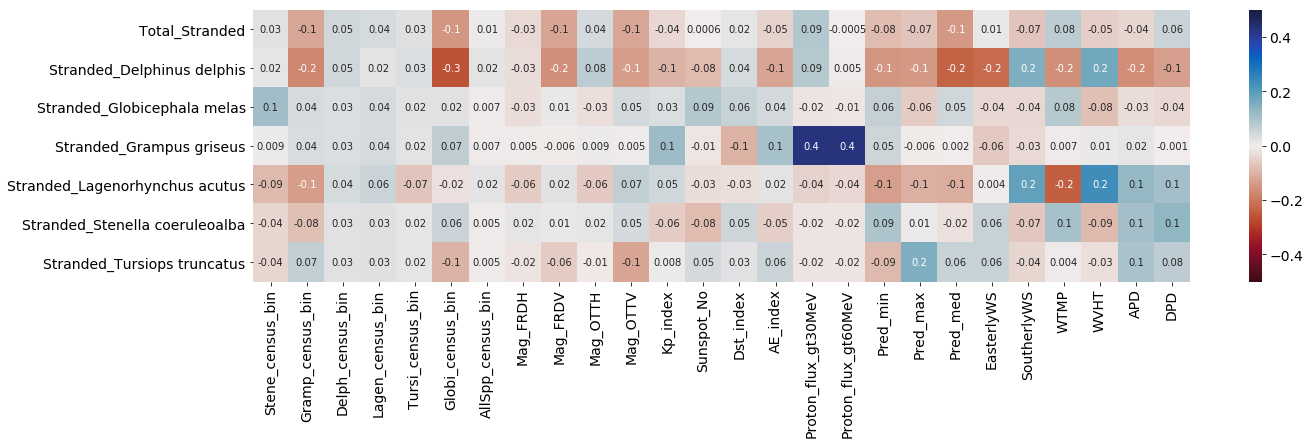

In [95]:
dfAll_1_corr = df_All_1.corr()
f, ax = pl.subplots(figsize=(21, 5))
ax.set_facecolor('black')
heatmap(dfAll_1_corr.loc[df_labels.columns, df_1.columns],
        ax=ax, vmin=-.5, vmax=.5, cmap=cmo.balance_r, annot=True, fmt='.1g');

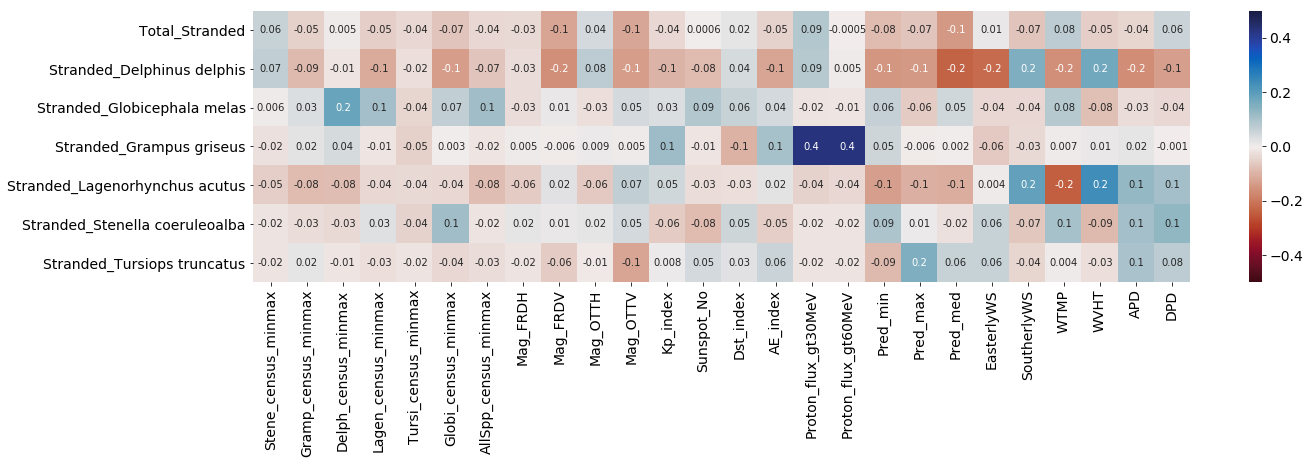

In [97]:
dfAll_2_corr = df_All_2.corr()
f, ax = pl.subplots(figsize=(21, 5))
ax.set_facecolor('black')
heatmap(dfAll_2_corr.loc[df_labels.columns, df_2.columns],
        ax=ax, vmin=-.5, vmax=.5, cmap=cmo.balance_r, annot=True, fmt='.1g');